### Predicting Survival On The Titanic

In [ ]:
Data Set obtained from kaggle Titanic 

### Data Dictionary 
|Variable|Definition|Key|
|--------|----------|---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	|
|Age|	Age in years|	
|sibsp	|# of siblings / spouses aboard the Titanic	|
|parch	|# of parents / children aboard the Titanic	|
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

#### Libraries required for the project

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
data = pd.read_csv('titanic_train.csv')

In [4]:
#printing first few records 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [5]:
#shape of the data
data.shape

(891, 12)

In [6]:
#statistics of dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### EDA

In [8]:
#listing the column names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#let's drop the columns we don't need
columns = ['PassengerId', 'Name', 'Cabin', 'Ticket']
data = data.drop(columns , axis =1)

In [11]:
#displying few records to verify
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,male,80.0,0,0,30.0000,S
1,0,3,male,74.0,0,0,7.7750,S
2,0,1,male,71.0,0,0,34.6542,C
3,0,1,male,71.0,0,0,49.5042,C
4,0,3,male,70.5,0,0,7.7500,Q


In [13]:
#checking the data types 
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [14]:
#checking unique value count
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [15]:
#checking for missing values
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### Let's refine the dataset

In [16]:
#replacing the missing values
data['Age'] =  data['Age'].replace(np.nan,data['Age'].median(axis=0))
data['Embarked'] = data['Embarked'].replace(np.nan, 'S')

In [17]:
#type casting Age to integer
data['Age'] = data['Age'].astype(int)

In [18]:
#replacing with 1 and female with 0
data['Sex'] = data['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [19]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
data['Age'] = pd.cut(x=data['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

#### Visualization

<Axes: xlabel='Parch', ylabel='count'>

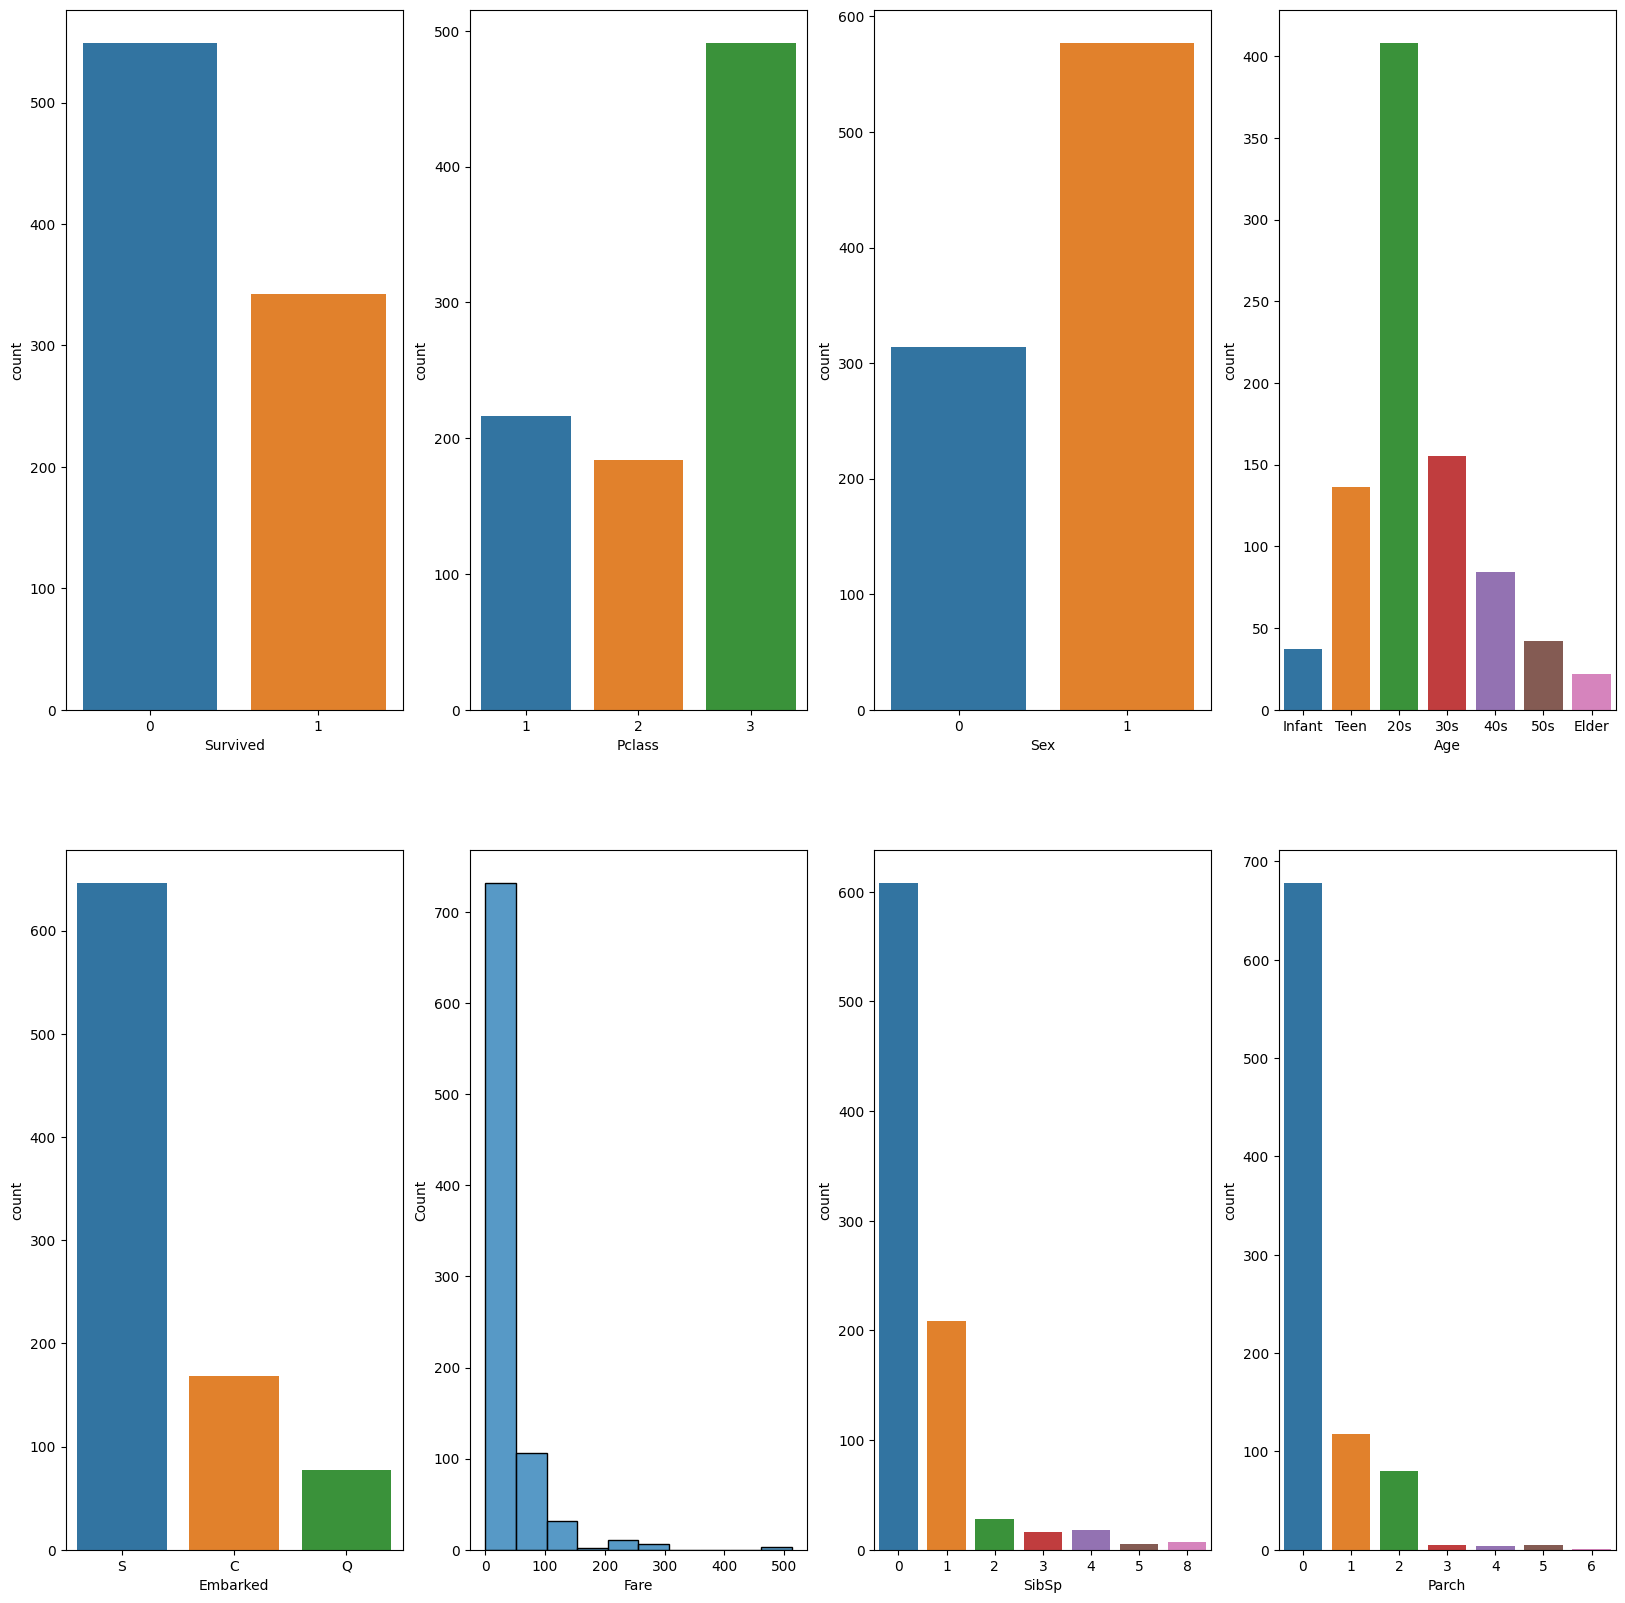

In [21]:
# visulizing the count of the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = data, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = data, ax=ax[0,1])
sns.countplot(x = 'Sex', data = data, ax=ax[0,2])
sns.countplot(x = 'Age', data = data, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = data, ax=ax[1,0])
sns.histplot(x = 'Fare', data= data, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = data, ax=ax[1,2])
sns.countplot(x = 'Parch', data = data, ax=ax[1,3])

<Axes: xlabel='Pclass', ylabel='Survived'>

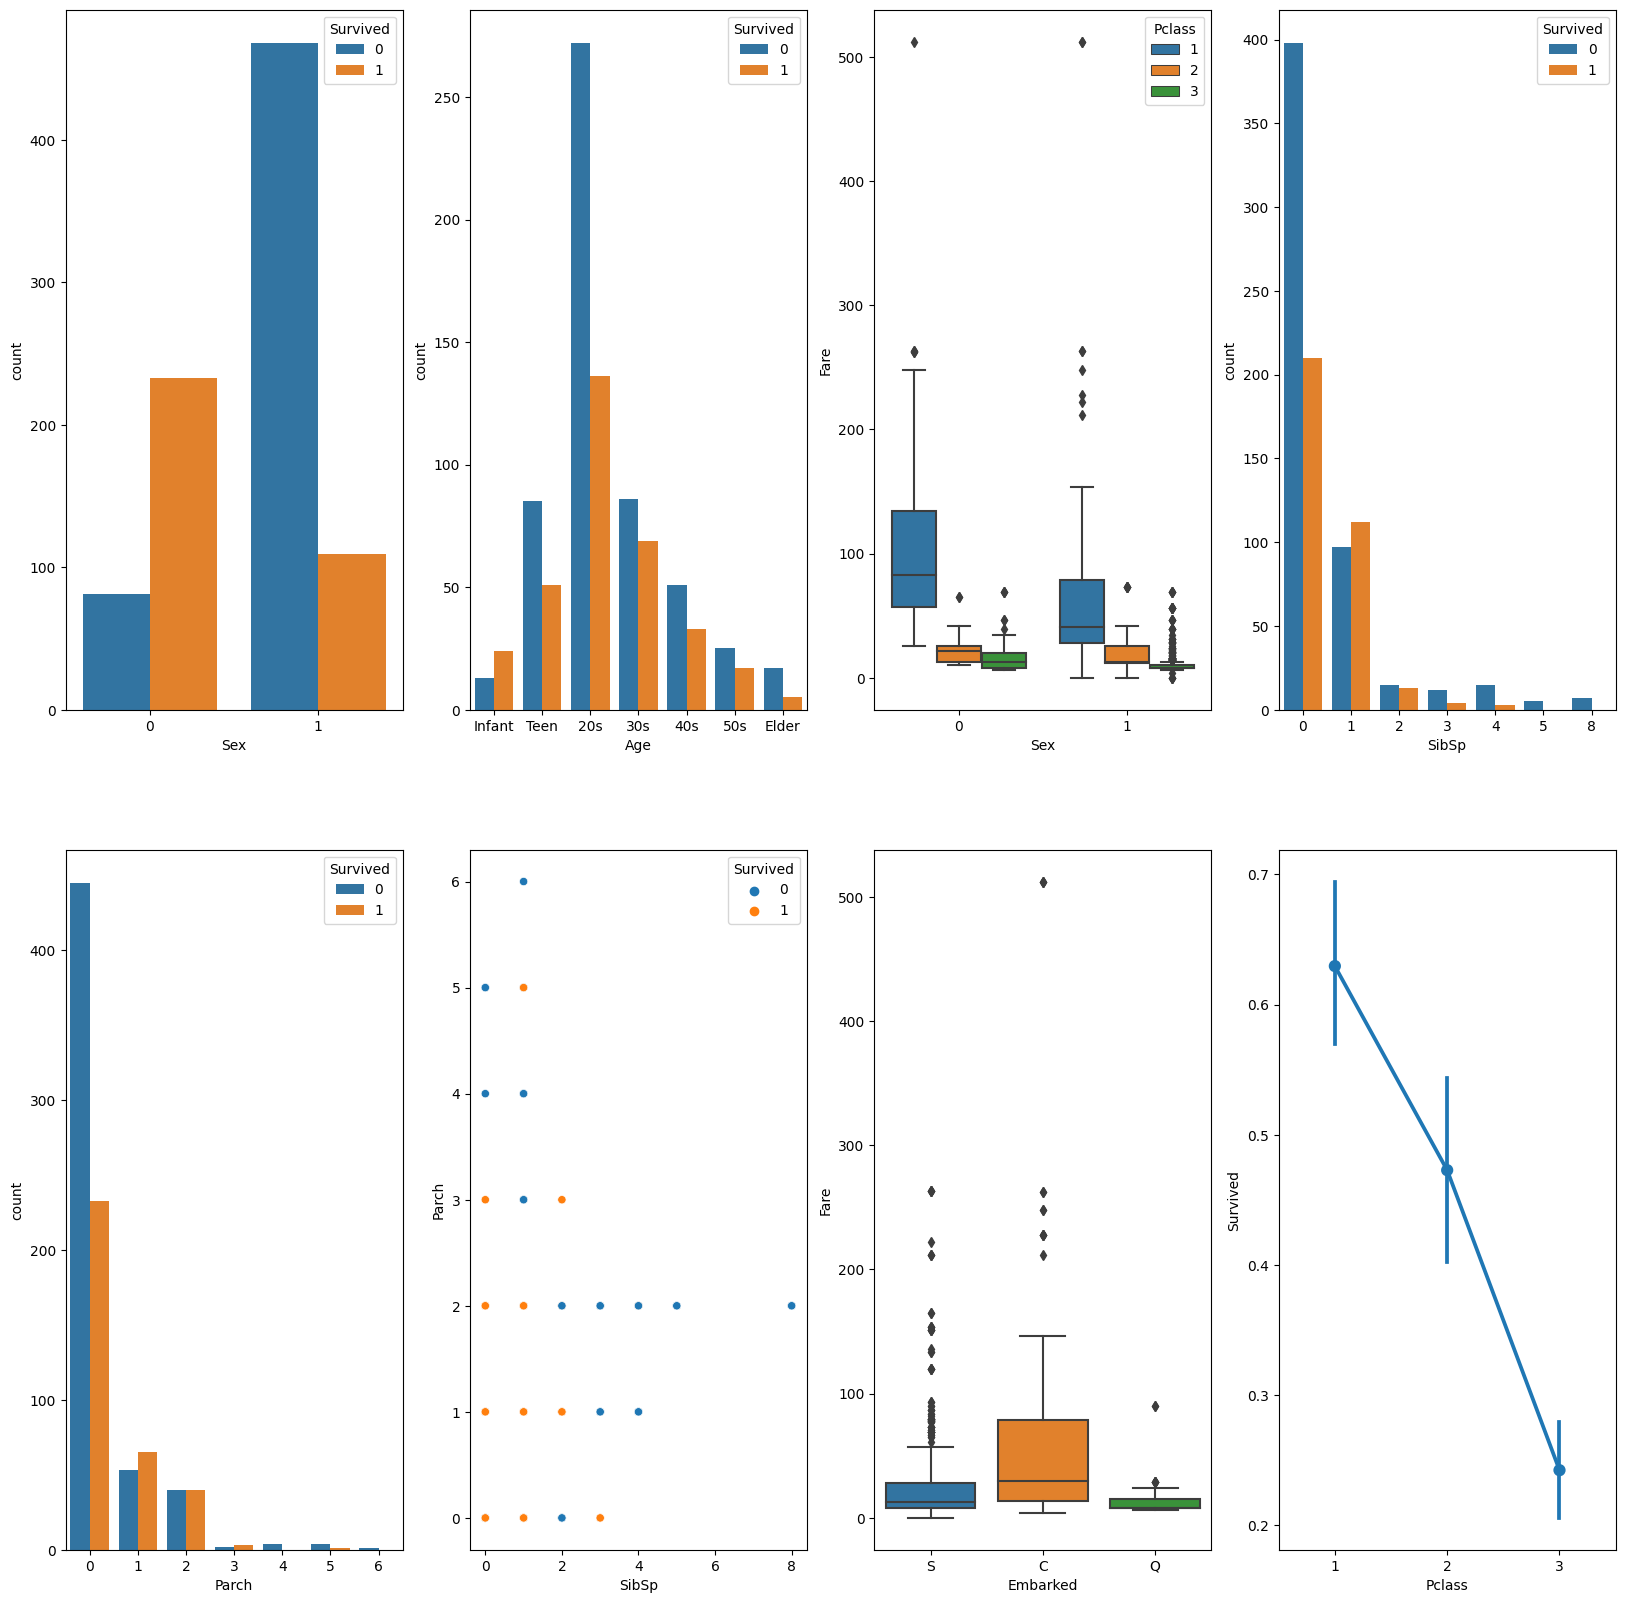

In [22]:
#visualizing the relationship beteen the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = data, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = data, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = data, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = data, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = data, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = data,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = data, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = data, ax=ax[1,3])

#### Model Building

In [23]:
#importing preprocessing from sklearn
from sklearn import preprocessing

In [24]:
#let's labelecnode the categorical 
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
data['Embarked'] = le.transform(data['Embarked'])

In [25]:
#age mapping
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
data['Age'] = data['Age'].map(age_mapping)
data.dropna(subset=['Age'], axis= 0, inplace = True)

##### Coorelation Heatmap

<Axes: >

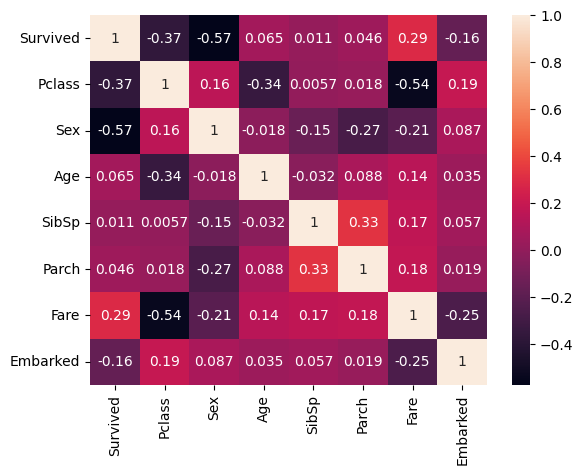

In [26]:
#generating coorelation between the variables
sns.heatmap(data.corr(), annot= True)

In [27]:
#let's seperate the traget and independent variable
y = data['Survived']
x = data.drop(columns = ['Survived'])

##### Model Training - Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [30]:
#let's try to fit the model and see the score
lr.fit(x,y)
lr.score(x,y)

C:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.818577648766328

###### We got the accuracy of 81.86 % on training data, which is not bad. 

In [31]:
#### let's try to build another model and see how the score goes in that 

#### Model - K-Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn


KNeighborsClassifier()

In [33]:
#let's fit the model and see the score
knn.fit(x,y)
knn.score(x,y)

0.8127721335268505

#### Model - Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [35]:
dtree.fit(x,y)
dtree.score(x,y)

0.9404934687953556

### We got highest accuracy using Decision Tree Classifier among out three models 

In [36]:
#### Let's import the test dataset and see how does this work there 

In [37]:
test_data = pd.read_csv('titanic_test.csv')
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#removing the columns
test_data = test_data.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

In [39]:
test_data['Age'] =  test_data['Age'].replace(np.nan,test_data['Age'].median(axis=0))
test_data['Embarked'] = test_data['Embarked'].replace(np.nan, 'S')

In [40]:
#type casting Age to integer
test_data['Age'] = test_data['Age'].astype(int)

In [42]:
#replacing with 1 and female with 0
test_data['Sex'] = test_data['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [43]:
test_data['Age'] = pd.cut(x=test_data['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = [0,1,2,3,4,5,6])

In [44]:
le.fit(['S','C','Q'])
test_data['Embarked'] = le.transform(test_data['Embarked'])

In [45]:
test_data.dropna(subset=['Age'], axis= 0, inplace = True)

In [46]:
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,7.2500,2
1,1,1,0,3,1,0,71.2833,0
2,1,3,0,2,0,0,7.9250,2
3,1,1,0,3,1,0,53.1000,2
4,0,3,1,3,0,0,8.0500,2


In [47]:
#let's seperate the target and independent variable for test data set
x = test_data.drop(columns=['Survived'])
y = test_data['Survived']

#### let's use the decision tree classifier model for this test data 

In [49]:
tree_pred = dtree.predict(x)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y, tree_pred)

0.8993212669683258

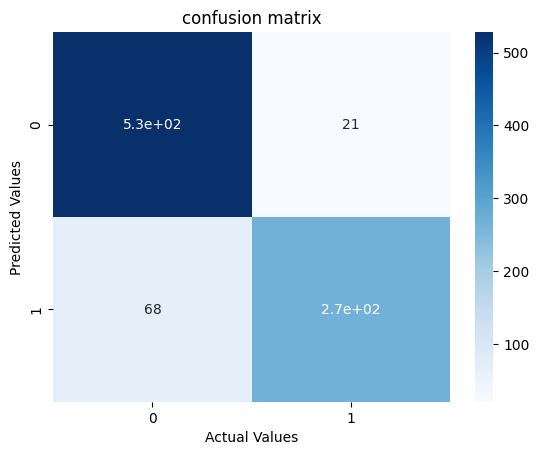

In [52]:
#confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y,tree_pred),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()

#### Overall we got the 89.93 % in test data, which is still good and we can say our model is good fit for this task.